Leemos los datos mediante la libreria **pandas** de python e indexamos el dataset que tenemos por la fecha. Esto nos permitira luego para un tratamiento de datos más fácil, al filtrar por fechas en concreto.



In [3]:
import pandas as pd

weather = pd.read_csv("local_weather.csv", index_col="DATE")

In [4]:
weather

,STATION,NAME,PRCP,SNWD,TAVG,TMAX,TMIN
DATE,,,,,,,
2020-01-01,CO000080222,"BOGOTA ELDORADO, CO",0.0,NaN,57,71.0,45.0
2020-01-02,CO000080222,"BOGOTA ELDORADO, CO",0.0,NaN,59,NaN,45.0
2020-01-03,CO000080222,"BOGOTA ELDORADO, CO",0.0,NaN,58,73.0,NaN
2020-01-04,CO000080222,"BOGOTA ELDORADO, CO",0.0,NaN,55,72.0,41.0
2020-01-05,CO000080222,"BOGOTA ELDORADO, CO",0.0,NaN,56,71.0,43.0
...,...,...,...,...,...,...,...
2023-10-15,CO000080222,"BOGOTA ELDORADO, CO",NaN,NaN,57,NaN,46.0
2023-10-16,CO000080222,"BOGOTA ELDORADO, CO",NaN,NaN,56,NaN,46.0
2023-10-17,CO000080222,"BOGOTA ELDORADO, CO",NaN,NaN,57,NaN,NaN


Vamos a preparar los datos para ML, para esto vamos a eliminar los datos nulos con la funcion de pandas `isnull`. Luego usamos `/weather.shape` lo que nos dará el % de valores nulos.



In [5]:
weather.apply(pd.isnull).sum()/weather.shape[0]

STATION    0.000000
NAME       0.000000
PRCP       0.643321
SNWD       0.966065
TAVG       0.000000
TMAX       0.775451
TMIN       0.470036
dtype: float64

Luego seleccionamos las columnas que se consideran principales, esto se puede encontrar en la  [documentación](https://www1.ncdc.noaa.gov/pub/data/cdo/documentation/GHCND_documentation.pdf) y las renombramos.

In [6]:
core_weather = weather[["PRCP", "SNWD", "TMAX", "TMIN", "TAVG"]].copy()
core_weather.columns = ["precip", "snow_depth", "temp_max", "temp_min", "temp_avg"]

In [7]:
core_weather.apply(pd.isnull).sum()

precip         891
snow_depth    1338
temp_max      1074
temp_min       651
temp_avg         0
dtype: int64

Procedemos a indexar **core_weather** y con la función que vemos abajo, sólo se seleccionará filas donde ***precip*** es de valor `null`

In [8]:
core_weather[pd.isnull(core_weather["precip"])]

,precip,snow_depth,temp_max,temp_min,temp_avg
DATE,,,,,
2020-01-11,NaN,NaN,70.0,NaN,54
2020-01-13,NaN,NaN,NaN,47.0,58
2020-01-15,NaN,NaN,71.0,44.0,58
2020-02-06,NaN,NaN,76.0,31.0,53
2020-02-23,NaN,NaN,72.0,NaN,57
...,...,...,...,...,...
2023-10-15,NaN,NaN,NaN,46.0,57
2023-10-16,NaN,NaN,NaN,46.0,56
2023-10-17,NaN,NaN,NaN,NaN,57


In [9]:
core_weather.loc["2020-05-13",:]

precip         0.12
snow_depth      NaN
temp_max        NaN
temp_min      51.00
temp_avg      57.00
Name: 2020-05-13, dtype: float64

In [10]:
core_weather["precip"].value_counts() / core_weather.shape[0]

0.00    0.206498
0.04    0.020939
0.02    0.014440
0.08    0.013718
0.01    0.011552
0.12    0.010830
0.16    0.009386
0.24    0.008664
0.20    0.007942
0.28    0.007942
0.03    0.005054
0.39    0.004332
0.31    0.003610
0.35    0.003610
0.79    0.002888
0.47    0.002888
0.43    0.002888
0.51    0.002166
0.67    0.002166
0.63    0.001444
0.71    0.001444
0.59    0.001444
1.38    0.000722
0.75    0.000722
0.83    0.000722
0.87    0.000722
0.77    0.000722
6.37    0.000722
1.18    0.000722
6.30    0.000722
1.46    0.000722
0.94    0.000722
2.56    0.000722
1.89    0.000722
3.58    0.000722
3.90    0.000722
9.85    0.000722
Name: precip, dtype: float64

Debido a que muchos valores de **precip** son "missing values", los reemplazamos con 0

In [11]:
core_weather["precip"] = core_weather["precip"].fillna(0)

In [12]:
core_weather.apply(pd.isnull).sum()

precip           0
snow_depth    1338
temp_max      1074
temp_min       651
temp_avg         0
dtype: int64

Con la linea de código que encontramos abajo, podemos de igual forma ver que valores están 'missing'

In [13]:
core_weather[pd.isnull(core_weather["temp_min"])]

,precip,snow_depth,temp_max,temp_min,temp_avg
DATE,,,,,
2020-01-03,0.0,NaN,73.0,NaN,58
2020-01-06,0.0,NaN,NaN,NaN,54
2020-01-08,0.0,NaN,NaN,NaN,54
2020-01-11,0.0,NaN,70.0,NaN,54
2020-01-14,0.0,NaN,74.0,NaN,58
...,...,...,...,...,...
2023-10-06,0.0,0.4,NaN,NaN,58
2023-10-08,0.0,NaN,NaN,NaN,59
2023-10-13,0.0,NaN,NaN,NaN,57


In [14]:
core_weather.loc["2020-12-18":"2023-12-28"]

,precip,snow_depth,temp_max,temp_min,temp_avg
DATE,,,,,
2020-12-18,0.0,NaN,NaN,NaN,57
2020-12-19,0.0,NaN,NaN,NaN,59
2020-12-20,0.0,NaN,NaN,NaN,60
2020-12-21,0.0,NaN,NaN,NaN,56
2020-12-22,0.0,NaN,NaN,NaN,56
...,...,...,...,...,...
2023-10-15,0.0,NaN,NaN,46.0,57
2023-10-16,0.0,NaN,NaN,46.0,56
2023-10-17,0.0,NaN,NaN,NaN,57


Reemplazamos los valores

In [15]:
core_weather = core_weather.fillna(method="ffill")

Verificamos cuantos valores siguen 'missing' luego de haber sido reemplazados

In [16]:
core_weather.apply(pd.isnull).sum()

precip          0
snow_depth    825
temp_max        0
temp_min        0
temp_avg        0
dtype: int64

In [17]:
# Check for missing value defined in data documentation
core_weather.apply(lambda x: (x == 9999).sum())

precip        0
snow_depth    0
temp_max      0
temp_min      0
temp_avg      0
dtype: int64

Verificamos que tengamos los tipos de datos correctos debido a que en el algoritmo de ML es muy importante que los valores que estamos usando para realizar predicciones son númericos.

In [18]:
core_weather.dtypes

precip        float64
snow_depth    float64
temp_max      float64
temp_min      float64
temp_avg        int64
dtype: object

Este index es tratado unicamente com un string

In [19]:
core_weather.index

Index(['2020-01-01', '2020-01-02', '2020-01-03', '2020-01-04', '2020-01-05',
       '2020-01-06', '2020-01-07', '2020-01-08', '2020-01-09', '2020-01-10',
       ...
       '2023-10-10', '2023-10-11', '2023-10-12', '2023-10-13', '2023-10-14',
       '2023-10-15', '2023-10-16', '2023-10-17', '2023-10-18', '2023-10-19'],
      dtype='object', name='DATE', length=1385)

Convertimos ese dato a un `datetime.index` lo que nos permitirá realizar una manipulación de datos mas cómoda en un futuro.

In [20]:
core_weather.index = pd.to_datetime(core_weather.index)

Luego verificamos que se ha convertido a lo que deseamos:

In [21]:
core_weather.index

DatetimeIndex(['2020-01-01', '2020-01-02', '2020-01-03', '2020-01-04',
               '2020-01-05', '2020-01-06', '2020-01-07', '2020-01-08',
               '2020-01-09', '2020-01-10',
               ...
               '2023-10-10', '2023-10-11', '2023-10-12', '2023-10-13',
               '2023-10-14', '2023-10-15', '2023-10-16', '2023-10-17',
               '2023-10-18', '2023-10-19'],
              dtype='datetime64[ns]', name='DATE', length=1385, freq=None)

In [22]:
core_weather.index.year

Int64Index([2020, 2020, 2020, 2020, 2020, 2020, 2020, 2020, 2020, 2020,
            ...
            2023, 2023, 2023, 2023, 2023, 2023, 2023, 2023, 2023, 2023],
           dtype='int64', name='DATE', length=1385)

## Analisis de nuestros datos

<Axes: xlabel='DATE'>

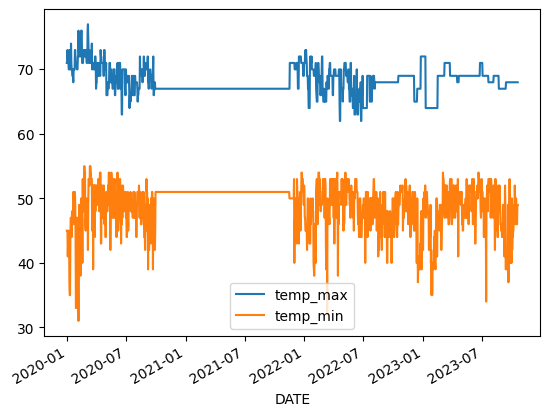

In [23]:
core_weather[["temp_max", "temp_min"]].plot()

En la gráfica podemos ver algo extraño, y es que vemos 'gaps' a partir de 2020-12 hasta 2022-01 apróximadamente.

Para esto, observamos que datos indexados por año están perdidos o no existen

In [24]:
core_weather.index.year.value_counts().sort_index()

2020    366
2021    362
2022    365
2023    292
Name: DATE, dtype: int64

<Axes: xlabel='DATE'>

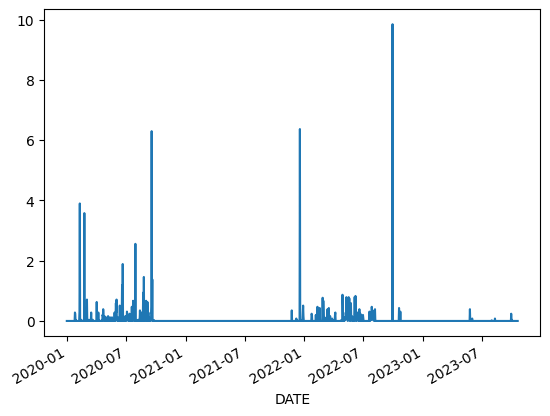

In [25]:
core_weather["precip"].plot()

Acá observamos que tanto ha llovido por año

In [26]:
core_weather.groupby(core_weather.index.year).sum()["precip"]

DATE
2020    39.58
2021     7.85
2022    29.64
2023     0.85
Name: precip, dtype: float64

<Axes: xlabel='DATE'>

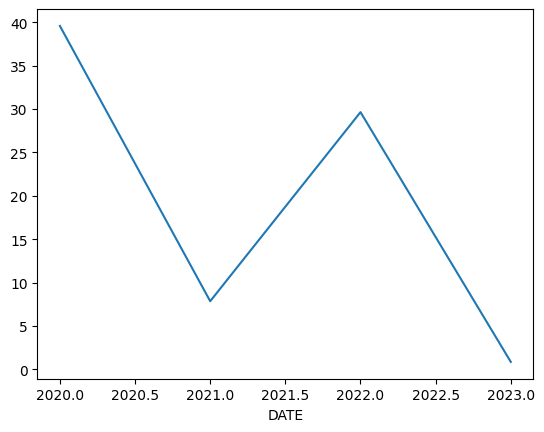

In [27]:
core_weather.groupby(core_weather.index.year).apply(lambda x: x["precip"].sum()).plot()

Entrenando nuestro algoritmo de ML: Para esto tenemos que definir que queremos predecir, en éste caso para fines éstadisticos lo haremos con la temperatura máxima

In [28]:
core_weather["target"] = core_weather.shift(-1)["temp_max"]

In [29]:
core_weather

,precip,snow_depth,temp_max,temp_min,temp_avg,target
DATE,,,,,,
2020-01-01,0.0,NaN,71.0,45.0,57,71.0
2020-01-02,0.0,NaN,71.0,45.0,59,73.0
2020-01-03,0.0,NaN,73.0,45.0,58,72.0
2020-01-04,0.0,NaN,72.0,41.0,55,71.0
2020-01-05,0.0,NaN,71.0,43.0,56,71.0
...,...,...,...,...,...,...
2023-10-15,0.0,2.0,68.0,46.0,57,68.0
2023-10-16,0.0,2.0,68.0,46.0,56,68.0
2023-10-17,0.0,2.0,68.0,46.0,57,68.0


En esta tabla que se imprimió arriba se observa que el target es del dia siguiente usando datos de un dia actual.

In [30]:
core_weather = core_weather.iloc[:-1,:].copy()

In [31]:
core_weather

,precip,snow_depth,temp_max,temp_min,temp_avg,target
DATE,,,,,,
2020-01-01,0.0,NaN,71.0,45.0,57,71.0
2020-01-02,0.0,NaN,71.0,45.0,59,73.0
2020-01-03,0.0,NaN,73.0,45.0,58,72.0
2020-01-04,0.0,NaN,72.0,41.0,55,71.0
2020-01-05,0.0,NaN,71.0,43.0,56,71.0
...,...,...,...,...,...,...
2023-10-14,0.0,2.0,68.0,50.0,58,68.0
2023-10-15,0.0,2.0,68.0,46.0,57,68.0
2023-10-16,0.0,2.0,68.0,46.0,56,68.0


Usamos regresión de crestas para empezar a construir nuestro algoritmo de ML. Alpha es el parametro que nos controla que tanto de los datos queremos analizar.

In [32]:
from sklearn.linear_model import Ridge

reg = Ridge(alpha=.1)

Se crea una lista para definir que se usa para predecir en **target**

In [33]:
predictors = ["precip", "temp_max", "temp_min"]

Dividimos los datos en dos conjuntos, **train** y **test**

In [34]:
train = core_weather.loc[:"2020-12-31"]
test = core_weather.loc["2021-01-01":]

En este caso nuestro conjunto de datos de **train** es para antes del 2020 y el de **test** es para despues del 2021. Este tipo de division es muy importante para cuando estamos usando datos de series de tiempo. Lo que no queremos hacer es usar datos del futuro para predecir eventos del pasado

In [35]:
train

,precip,snow_depth,temp_max,temp_min,temp_avg,target
DATE,,,,,,
2020-01-01,0.0,NaN,71.0,45.0,57,71.0
2020-01-02,0.0,NaN,71.0,45.0,59,73.0
2020-01-03,0.0,NaN,73.0,45.0,58,72.0
2020-01-04,0.0,NaN,72.0,41.0,55,71.0
2020-01-05,0.0,NaN,71.0,43.0,56,71.0
...,...,...,...,...,...,...
2020-12-27,0.0,NaN,67.0,51.0,56,67.0
2020-12-28,0.0,NaN,67.0,51.0,55,67.0
2020-12-29,0.0,NaN,67.0,51.0,57,67.0


In [36]:
test

,precip,snow_depth,temp_max,temp_min,temp_avg,target
DATE,,,,,,
2021-01-01,0.0,NaN,67.0,51.0,59,67.0
2021-01-02,0.0,NaN,67.0,51.0,57,67.0
2021-01-03,0.0,NaN,67.0,51.0,58,67.0
2021-01-04,0.0,NaN,67.0,51.0,57,67.0
2021-01-05,0.0,NaN,67.0,51.0,54,67.0
...,...,...,...,...,...,...
2023-10-14,0.0,2.0,68.0,50.0,58,68.0
2023-10-15,0.0,2.0,68.0,46.0,57,68.0
2023-10-16,0.0,2.0,68.0,46.0,56,68.0


In [37]:
reg.fit(train[predictors], train["target"])

Ridge(alpha=0.1)

Definimos con este codigo `predictions = reg.predict(test[predictors])` ya las predicciones. Es decir, luego de su ejecución ya se tiene las predicciones.

In [38]:
predictions = reg.predict(test[predictors])

In [39]:
from sklearn.metrics import mean_squared_error

mean_squared_error(test["target"], predictions)

0.9791157359572725

In [40]:
from sklearn.metrics import mean_absolute_error

mean_absolute_error(test["target"], predictions)

0.5621660338892788

Este valor de ***0.5621660338892788*** nos indica que en promedio estuvimos 0.5 grados por fuera de la temperatura real.

Realizando esta combinación, podemos analizar lado a lado los valores actuales vs los valores que se predijeron

In [39]:
combined = pd.concat([test["target"], pd.Series(predictions, index=test.index)], axis=1)
combined.columns = ["actual", "predictions"]

In [40]:
combined

,actual,predictions
DATE,,
2021-01-01,67.0,67.282600
2021-01-02,67.0,67.282600
2021-01-03,67.0,67.282600
2021-01-04,67.0,67.282600
2021-01-05,67.0,67.282600
...,...,...
2023-10-14,68.0,68.114103
2023-10-15,68.0,68.325319
2023-10-16,68.0,68.325319


<Axes: xlabel='DATE'>

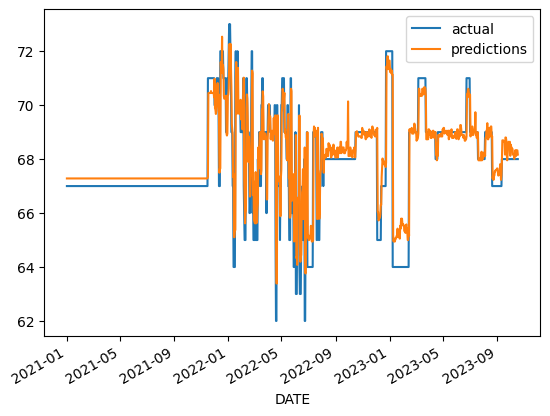

In [41]:
combined.plot()

In [41]:
reg.coef_

array([ 0.20547812,  0.77869923, -0.05280383])

Este primer valor es la precipitacion, el segundo la temperatura máxima y la tercera la temperatura minima.

In [42]:
core_weather["month_max"] = core_weather["temp_max"].rolling(30).mean()

core_weather["month_day_max"] = core_weather["month_max"] / core_weather["temp_max"]

core_weather["max_min"] = core_weather["temp_max"] / core_weather["temp_min"]

In [43]:
core_weather = core_weather.iloc[30:,:].copy()

In [44]:
def create_predictions(predictors, core_weather, reg):
    train = core_weather.loc[:"2020-12-31"]
    test = core_weather.loc["2021-01-01":]

    reg.fit(train[predictors], train["target"])
    predictions = reg.predict(test[predictors])

    error = mean_squared_error(test["target"], predictions)

    combined = pd.concat([test["target"], pd.Series(predictions, index=test.index)], axis=1)
    combined.columns = ["actual", "predictions"]
    return error, combined

In [45]:
predictors = ["precip", "temp_max", "temp_min", "month_day_max", "max_min"]

error, combined = create_predictions(predictors, core_weather, reg)
error

0.9791593064276789

<Axes: xlabel='DATE'>

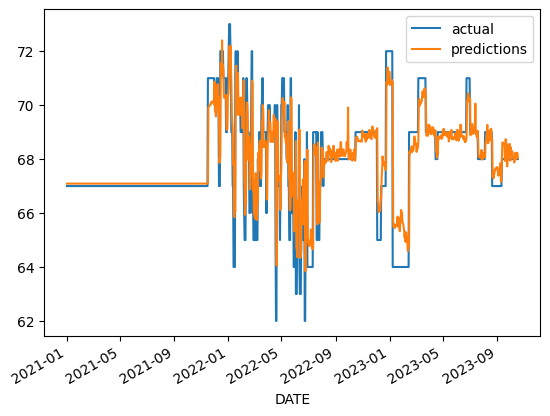

In [46]:
combined.plot()

In [ ]:
core_weather["monthly_avg"] = core_weather["temp_max"].groupby(core_weather.index.month).apply(lambda x: x.expanding(1).mean())
core_weather["day_of_year_avg"] = core_weather["temp_max"].groupby(core_weather.index.day_of_year).apply(lambda x: x.expanding(1).mean())

In [48]:
error, combined = create_predictions(predictors + ["monthly_avg", "day_of_year_avg"], core_weather, reg)
error

1.9471827756213247

In [49]:
reg.coef_

array([ 0.15912098,  0.31331775, -0.0103437 ,  5.19551428,  1.37982781,
        0.24567924,  0.31331775])

In [50]:
core_weather.corr()["target"]

precip             0.054066
snow_depth        -0.133702
temp_max           0.846791
temp_min          -0.097732
temp_avg           0.286568
target             1.000000
month_max          0.604169
month_day_max     -0.508791
max_min            0.382098
monthly_avg        0.358214
day_of_year_avg    0.599205
Name: target, dtype: float64

In [51]:
combined["diff"] = (combined["actual"] - combined["predictions"]).abs()

In [52]:
combined.sort_values("diff", ascending=False).head(10)

,actual,predictions,diff
DATE,,,
2022-06-23,62.0,67.992528,5.992528
2023-01-08,64.0,69.860078,5.860078
2022-04-19,62.0,67.326535,5.326535
2022-06-03,63.0,68.277984,5.277984
2022-06-11,64.0,68.654624,4.654624
2022-01-17,71.0,66.601379,4.398621
2022-04-20,62.0,66.212782,4.212782
2022-04-18,65.0,69.183687,4.183687
2022-05-22,71.0,66.829954,4.170046
